In [1]:
import pandas as pd
import glob
import os
import random

# Read input data

In [2]:
review_df = pd.DataFrame()
genre_df = pd.DataFrame()

# Read all CSV files and store them in a list
csv_files = glob.glob('2_reviews_per_movie_raw/*.csv')
review_dataframes = []

In [3]:
# Iterate through each file and read it into a DataFrame
for file in csv_files:
    review_df = pd.read_csv(file)
    review_dataframes.append(review_df)
    # Extract movie name and year release from the file name
    movie_name = os.path.basename(file)[:-8]
    year_release = os.path.basename(file)[-8:-4]  
    # Add movie_name and year_release columns to the DataFrame
    review_df['movie_name'] = movie_name
    review_df['year_release'] = year_release  
    review_dataframes.append(review_df)

In [5]:
# Combine all DataFrames into a single DataFrame
review_df = pd.concat(review_dataframes, ignore_index=True)
# Randomly select 10% of records from the DataFrame
n = int(len(review_df) * 0.1)
review_df = review_df.sample(n)  
len(review_df)

186313

# Basic EDA

In [6]:
# Perform EDA on the combined DataFrame
# Example EDA tasks
print("Shape of the combined DataFrame:", review_df.shape)
print("Columns in the combined DataFrame:", review_df.columns)
print("Sample records:")
print(review_df.head())
print("Summary statistics:")
print(review_df.describe())
# Add more EDA tasks as per your requirements


Shape of the combined DataFrame: (186313, 9)
Columns in the combined DataFrame: Index(['username', 'rating', 'helpful', 'total', 'date', 'title', 'review',
       'movie_name', 'year_release'],
      dtype='object')
Sample records:
              username rating  helpful  total               date  \
240148    tylerhoinsky      6        7     12   21 February 2018   
706360     ceesotnas15     10        2      7         2 May 2008   
1231089   David_Frames      7        1      2        30 May 2005   
1858463  catcat_catcat      7        2      3  11 September 2007   
1135185        ruddaga      4        4      8       3 March 2010   

                                                   title  \
240148                        Not the Best Marvel Film\n   
706360                           A Logic-Dumbing Movie\n   
1231089                         A Two Hour Techo-Shock\n   
1858463                Keep an eye out for the colours\n   
1135185   Did people on here watch the same movie!?!?!\n   

In [7]:
print(review_df.head(5).to_string(index=False))

     username rating  helpful  total              date                                           title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [8]:
# Read all genre files and store them in a list
genre_files = glob.glob('1_movies_per_genre/*.csv')
genre_dataframes = []

In [9]:
# Iterate through each file and read it into a DataFrame
for file in genre_files:
    genre = os.path.basename(file)[:-4]  # Extract genre from file name (excluding ".csv")
    genre_df = pd.read_csv(file)
    
    # Add "genre" column to the DataFrame and populate it with the genre
    genre_df['genre'] = genre
    
    genre_dataframes.append(genre_df)

# Combine all DataFrames into a single DataFrame
genre_df = pd.concat(genre_dataframes, ignore_index=True)
# Trim leading and trailing spaces from "movie_name" column
review_df['movie_name'] = review_df['movie_name'].str.strip()

In [10]:
print(genre_df.head(5).to_string(index=False))

                                             name  year movie_rated run_length                      genres           release_date  rating  num_raters  num_reviews                                                                       review_url  genre
                                  The Dark Knight  2008       PG-13   2h 32min      Action; Crime; Drama;      18 July 2008 (USA)     9.0     2224522         6836 https://www.imdb.com/title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey= Action
                                        Inception  2010       PG-13   2h 28min Action; Adventure; Sci-Fi;      16 July 2010 (USA)     8.8     1981675         3820 https://www.imdb.com/title/tt1375666/reviews/_ajax?ref_=undefined&paginationKey= Action
                                       The Matrix  1999           R   2h 16min            Action; Sci-Fi;     31 March 1999 (USA)     8.7     1619761         4281 https://www.imdb.com/title/tt0133093/reviews/_ajax?ref_=undefined&paginationKey= Act

In [11]:
print(genre_df.shape)
print(genre_df.describe())

(1700, 11)
              year       rating    num_raters   num_reviews
count  1700.000000  1700.000000  1.700000e+03   1700.000000
mean   2002.798235     7.457706  4.134152e+05   1003.601176
std      14.359010     0.736682  3.277902e+05   1045.584805
min    1915.000000     3.500000  1.929000e+04    102.000000
25%    1999.000000     7.000000  1.812258e+05    393.750000
50%    2006.000000     7.600000  3.445890e+05    719.500000
75%    2012.000000     8.000000  5.722170e+05   1256.500000
max    2020.000000     9.300000  2.258845e+06  10279.000000


In [12]:
# Convert the columns to be merged on to a consistent data type
review_df['year_release'] = review_df['year_release'].astype(str)
genre_df['year'] = genre_df['year'].astype(str)


In [13]:
print(review_df.head(1))

            username rating  helpful  total              date  \
240148  tylerhoinsky      6        7     12  21 February 2018   

                              title  \
240148   Not the Best Marvel Film\n   

                                                   review     movie_name  \
240148  This is not the best marvel film ever as some ...  Black Panther   

       year_release  
240148         2018  


In [14]:
print(genre_df.head(1))

              name  year movie_rated run_length                  genres  \
0  The Dark Knight  2008       PG-13   2h 32min  Action; Crime; Drama;    

         release_date  rating  num_raters  num_reviews  \
0  18 July 2008 (USA)     9.0     2224522         6836   

                                          review_url   genre  
0  https://www.imdb.com/title/tt0468569/reviews/_...  Action  


# Merge input files

In [15]:
# Join the dataframes based on the specified columns
merged_df = pd.merge(review_df, genre_df, left_on=['movie_name', 'year_release'], right_on=['name', 'year'], how='inner')

# Rename the columns from "genre_df" with a prefix of "g_"
merged_df = merged_df.rename(columns=lambda x: 'g_' + x if x in genre_df.columns else x)

# Convert "rating_x" column to numeric
merged_df['rating_x'] = pd.to_numeric(merged_df['rating_x'], errors='coerce')

# Create the "rating_sentiment" column based on the rating values
merged_df['rating_sentiment'] = merged_df['rating_x'].apply(lambda x: 1 if x > 5 else 0)

columns_to_keep = ["rating_x", "title", "review", "movie_name", "year_release", "g_genre", "rating_y","rating_sentiment"]

# Retain only the desired columns
merged_df = merged_df.loc[:, columns_to_keep]

# Print the resulting merged dataframe
print(merged_df.head(1))

   rating_x                        title  \
0       6.0   Not the Best Marvel Film\n   

                                              review     movie_name  \
0  This is not the best marvel film ever as some ...  Black Panther   

  year_release g_genre  rating_y  rating_sentiment  
0         2018  Action       7.3                 1  


# Visualize Ratings

Summary statistics:
            rating_x
count  242085.000000
mean        7.310399
std         2.844742
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        10.000000


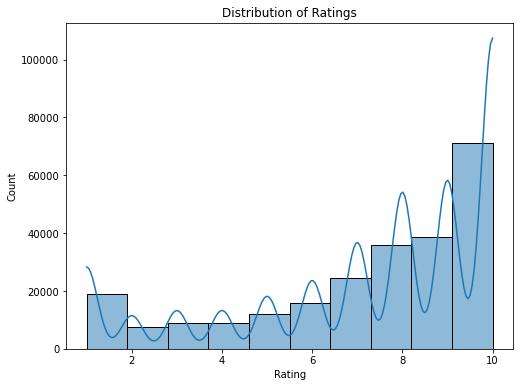

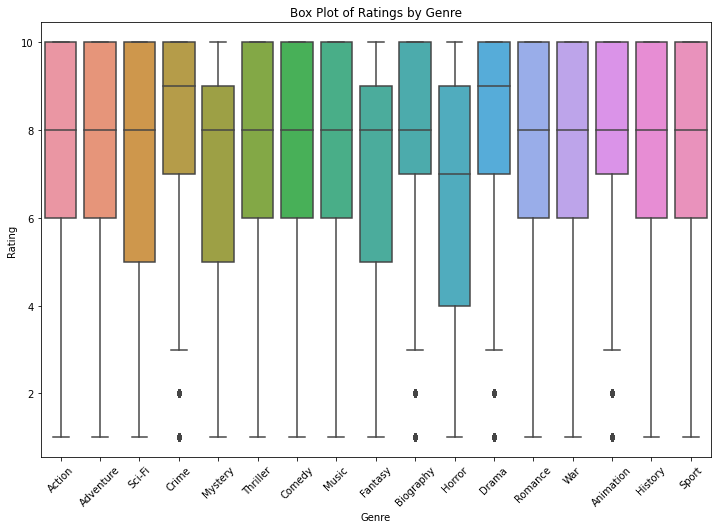

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA on the columns
# Summary statistics
print("Summary statistics:")
print(merged_df[['rating_x', 'g_genre']].describe())

# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(data=merged_df, x='rating_x', bins=10, kde=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

# Box plot of ratings by genre
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_df, x='g_genre', y='rating_x')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Box Plot of Ratings by Genre')
plt.xticks(rotation=45)
plt.show()


# Visualize Sentiment by Genre

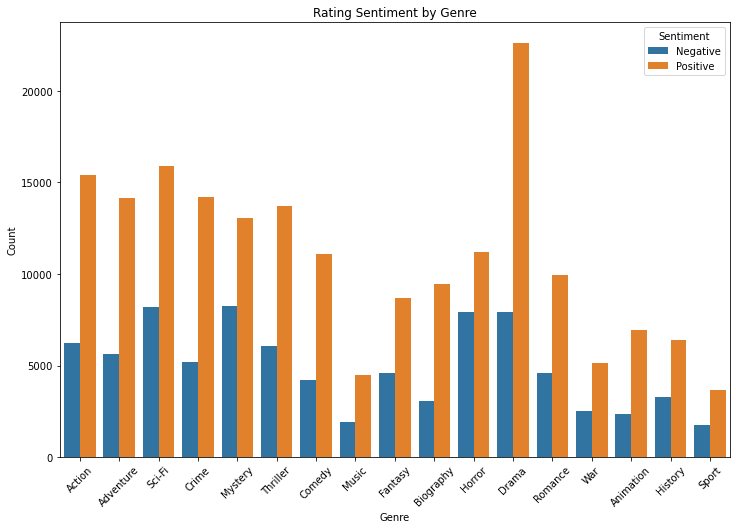

In [17]:
# Bar plot of rating sentiment by genre
plt.figure(figsize=(12, 8))
sns.countplot(data=merged_df, x='g_genre', hue='rating_sentiment')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Rating Sentiment by Genre')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', labels=['Negative', 'Positive'])
plt.show()

# Create pickle file using merged_df

In [18]:
import pickle

# Specify the file path for the pickle file
pickle_file_path = 'merged_df.pkl'

# Create and save the pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(merged_df, file)